In [1]:
from dabry.problem import NavigationProblem
from dabry.wind import DiscreteWind
from dabry.model import ZermeloGeneralModel
from dabry.misc import Utils, Chrono
from dabry.ddf_manager import DDFmanager
from dabry.solver_ef import SolverEF
from dabry.solver_es import SolverES
import numpy as np
from tqdm.notebook import tqdm
%matplotlib inline

In [8]:
i_member = 0
#nm = 51
nm = 10

#x_init = Utils.DEG_TO_RAD * np.array((50, -40))
#x_target = Utils.DEG_TO_RAD * np.array((0, -48))

x_init = Utils.DEG_TO_RAD * np.array((40, -30))
x_target = Utils.DEG_TO_RAD * np.array((20, -50))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))

with tqdm(total=nm) as pbar:
    for i_member in range(nm):
        wind = DiscreteWind()
        wind.load(f'../output/wind_scenarii3_{i_member}/_wind.h5')
        model = ZermeloGeneralModel(15, coords='gcs')
        model.update_wind(wind)

        
        pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

        ddf = DDFmanager(cache_wind=False)
        ddf.setup()
        ddf.set_case(f'wind_scenarii3_{i_member}')
        ddf.clean_output_dir()
        ddf.dump_wind(pb.model.wind)        

        #solver = SolverEF(pb, max_time=150*3600, max_steps=200, quick_solve=True)
        #res = solver.solve()
        #traj = res.traj
        
        if i_member == 0:
            kwargs = dict(dtheta=(25, 'deg'), N_disc=20)
        else:
            kwargs = dict(dtheta=(15, 'deg'), theta_init=solver.theta_opt,
                         N_disc=10)
        solver = SolverES(pb, 110*3600)
        traj = solver.solve(quiet=True, info=str(i_member), **kwargs)
        if traj is not None:
            traj.type = Utils.TRAJ_INT
            ddf.dump_trajs([traj])
        ddf.log(pb)
        pbar.update(1)

  0%|          | 0/10 [00:00<?, ?it/s]

In [9]:
import shutil
import os
dir_all = f'../output/wind_scenarii3_all'
if os.path.exists(dir_all):
    shutil.rmtree(dir_all)
os.mkdir(dir_all)
for i_member in range(nm):
    try:
        shutil.copy(f'../output/wind_scenarii3_{i_member}/trajectories.h5',
                   f'../output/wind_scenarii3_all/trajectories_{i_member}.h5')
    except FileNotFoundError:
        pass
shutil.copy('../output/wind_scenarii3_0/params.json', '../output/wind_scenarii3_all/params.json')
shutil.copy('../output/wind_scenarii3_0/wind.h5', '../output/wind_scenarii3_all/wind.h5')

'../output/wind_scenarii3_all/wind.h5'

In [4]:
i_member = 5

x_init = Utils.DEG_TO_RAD * np.array((50, -40))
#x_target = Utils.DEG_TO_RAD * np.array((0, -48))
x_target = Utils.DEG_TO_RAD * np.array((25, -44))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))

wind = DiscreteWind()
wind.load(f'../output/wind_scenarii3_{i_member}/_wind.h5')
model = ZermeloGeneralModel(15, coords='gcs')
model.update_wind(wind)
pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

ddf = DDFmanager(cache_wind=False)
ddf.setup()
ddf.set_case(f'wind_scenarii3_{i_member}')
ddf.clean_output_dir()
ddf.dump_wind(pb.model.wind)

solver = SolverES(pb, 110*3600, rel_tgt_thr=0.05)
traj = solver.solve(dtheta=(25, 'deg'), N_disc=20)
if traj is not None:
    ddf.dump_trajs([traj])
ddf.dump_trajs(solver.get_trajs())
ddf.log(pb)

[*] Shooting
[*] Done (856.0ms)


In [4]:
i_member = 5

x_init = Utils.DEG_TO_RAD * np.array((40, -30))
x_target = Utils.DEG_TO_RAD * np.array((25, -45))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))

wind = DiscreteWind()
wind.load(f'../output/wind_scenarii3_{i_member}/_wind.h5')
model = ZermeloGeneralModel(15, coords='gcs')
model.update_wind(wind)
pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

ddf = DDFmanager(cache_wind=False)
ddf.setup()
ddf.set_case(f'wind_scenarii3_{i_member}')
ddf.clean_output_dir()
ddf.dump_wind(pb.model.wind)

solver = SolverEF(pb, max_time=150*3600, dt=1800, max_steps=600, quick_solve=True)
res = solver.solve()
#ddf.dump_trajs(solver.get_trajs())
ddf.dump_trajs([res.traj])
ddf.log(pb)

Problem | TIMEOPT | 15.00 m/s | 2.12e+06 m | scale 39h20m | orthodromic DNR
Steps :    150/600, Extremals :    752, Active :  255, Dist :   2 Stopped quick solve
Target reached in 74h30m | +89% no wind | cpu time 19.12s


In [5]:
i_member = 5

x_init = np.array(res.traj.points[60])
x_target = Utils.DEG_TO_RAD * np.array((25, -45))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))

wind = DiscreteWind()
wind.load(f'../output/wind_scenarii3_{i_member}/_wind.h5')
model = ZermeloGeneralModel(15, coords='gcs')
model.update_wind(wind)
pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr,
                      t_init=res.traj.timestamps[60] + 4*3600)

ddf = DDFmanager(cache_wind=False)
ddf.setup()
ddf.set_case(f'wind_scenarii3_{i_member}_reroute')
ddf.clean_output_dir()
ddf.dump_wind(pb.model.wind)

solver = SolverEF(pb, max_time=40*3600, dt=900, max_steps=600, quick_solve=True)
res = solver.solve()
#ddf.dump_trajs(solver.get_trajs())
ddf.dump_trajs([res.traj])
ddf.log(pb)

Problem | TIMEOPT | 15.00 m/s | 6.49e+05 m | scale 12h0m | orthodromic DNR
Steps :    176/600, Extremals :   2653, Active : 1161, Dist :   2 Stopped quick solve
Target reached in 77h45m | +547% no wind | cpu time 72.70s


In [11]:
solver.ef.get_init_adjoint(80)

array([-0.03862712,  0.99388206])

In [23]:
res.traj.timestamps[0]

1692936000.0

In [3]:
x_init = Utils.DEG_TO_RAD * np.array((40, -30))
x_target = Utils.DEG_TO_RAD * np.array((25, -45))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))

wind = DiscreteWind()
wind.load(f'../output/wind_scenarii3_5/_wind.h5')
model = ZermeloGeneralModel(15, coords='gcs')
model.update_wind(wind)
pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

ddf = DDFmanager()
ddf.setup()
ddf.set_case(f'wind_scenarii3_5')
trajs = ddf.load_trajs()
pb.waypoints(trajs[0])

0 1692936000 1692936000 23.11 22.93 3.996 3.999
1 1692936539 1692936543 23.19 23.01 3.996 4
2 1692937078 1692937087 23.52 23.22 4.008 4
3 1692937614 1692937630 23.84 23.55 3.964 4.001
4 1692938151 1692938174 23.98 23.8 3.998 4.002
5 1692938691 1692938718 24.09 23.91 3.999 4.003
6 1692939230 1692939261 25 24.42 4.021 4.004
7 1692939761 1692939805 25.05 24.87 4 4.005
8 1692940301 1692940348 25.09 25.09 4.025 4.006
9 1692940844 1692940892 25.5 25.61 3.979 4.007
10 1692941390 1692941436 26.16 25.69 4.024 4.008
11 1692941924 1692941979 26.27 26.09 4.003 4.009
12 1692942464 1692942523 26.36 26.25 4.019 4.01
13 1692943005 1692943067 26.6 26.5 3.949 4.011
14 1692943546 1692943610 26.9 26.63 4.047 4.012
15 1692944084 1692944154 27.05 26.87 4.006 4.013
16 1692944624 1692944697 27.14 26.95 4.005 4.014
17 1692945164 1692945241 27.22 27 4.009 4.015
18 1692945703 1692945785 27.26 27.05 3.992 4.016
19 1692946242 1692946328 27.26 27.07 4.011 4.017
20 1692946782 1692946872 27.28 27.28 4.017 4.018
21 16

Exception: Unable to follow waypoints : wind too strong

In [16]:
i_member = 5

x_init = Utils.DEG_TO_RAD * np.array((40, -30))
x_target = Utils.DEG_TO_RAD * np.array((20, -50))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))

wind = DiscreteWind()
wind.load(f'../output/wind_scenarii3_{i_member}/_wind.h5')
model = ZermeloGeneralModel(15, coords='gcs')
model.update_wind(wind)
pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

ddf = DDFmanager(cache_wind=False)
ddf.setup()
ddf.set_case(f'wind_scenarii3_{i_member}')
ddf.clean_output_dir()
ddf.dump_wind(pb.model.wind)

solver = SolverES(pb, 150*3600, rel_tgt_thr=0.05)
trajs = solver.solve(150*3600, dtheta=(20, 'deg'), N_disc=20, debug=True)
ddf.dump_trajs(trajs)
ddf.log(pb)

[*] Shooting
[*] Done (282.1ms)


In [15]:
wind = DiscreteWind()
wind.load(f'../output/wind_scenarii_all/wind.h5')
model = ZermeloGeneralModel(23, coords='gcs')
model.update_wind(wind)

x_init = Utils.DEG_TO_RAD * np.array((-55, 40))
x_target = Utils.DEG_TO_RAD * np.array((-10, 40))

bl = Utils.DEG_TO_RAD * np.array((-60, 33))
tr = Utils.DEG_TO_RAD * np.array((-5, 55))

pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

ddf = DDFmanager(cache_wind=True)
ddf.setup()
ddf.set_case(f'wind_scenarii_all')

from dabry.feedback import HTargetFB
from dabry.stoppingcond import DistanceSC
pb.load_feedback(HTargetFB(x_target, 'gcs'))
sc = DistanceSC(lambda x: (x - x_target) @ (x - x_target), (x_init - x_target) @ (x_init - x_target) / 500)
pb.integrate_trajectory(x_init, sc, t_init=pb.model.wind.t_start, int_step=3600/100)
ddf.dump_trajs(pb.trajs, filename='trajectories_heuristic.h5')
ddf.log(pb)

## Backward control map

In [18]:
i_member = 0
#nm = 51
nm = 1

#x_init = Utils.DEG_TO_RAD * np.array((50, -40))
#x_target = Utils.DEG_TO_RAD * np.array((0, -48))

x_init = Utils.DEG_TO_RAD * np.array((40, -30))
x_target = Utils.DEG_TO_RAD * np.array((20, -50))

bl = Utils.DEG_TO_RAD * np.array((-10, -60))
tr = Utils.DEG_TO_RAD * np.array((60, -25))
cmaps = []
with tqdm(total=nm) as pbar:
    for i_member in range(nm):
        wind = DiscreteWind()
        wind.load(f'../output/wind_scenarii3_{i_member}/_wind.h5')
        model = ZermeloGeneralModel(15, coords='gcs')
        model.update_wind(wind)

        
        pb = NavigationProblem(model, x_init, x_target, 'gcs', bl=bl, tr=tr)

        ddf = DDFmanager(cache_wind=False)
        ddf.setup()
        ddf.set_case(f'wind_scenarii3_{i_member}')
        ddf.clean_output_dir()
        ddf.dump_wind(pb.model.wind)        

        #solver = SolverEF(pb, max_time=150*3600, max_steps=200, quick_solve=True)
        #res = solver.solve()
        #traj = res.traj
        max_time = 110*3600
        solver = SolverES(pb, max_time)
        traj = solver.solve(dtheta=(25, 'deg'), N_disc=20)
        
        time_opt = solver.time_opt
        
        for rel_delay in np.linspace(0, 0.2, 5):
            pb.t_init = pb.model.wind.t_start + time_opt*(1+rel_delay)
            solver = SolverEF(pb, max_time=1.2*time_opt, 
                              max_steps=200, 
                              quick_solve=True)
            solver.set_primal(False)
            solver.propagate()
            cmaps.append(solver.get_control_map(100, 100))
        
        pbar.update(1)

  0%|          | 0/1 [00:00<?, ?it/s]

[*] Shooting
[*] Done (797.1ms)
Steps :     20/200, Extremals :    114, Active :  114, Dist :  76 

Steps :    157/200, Extremals :   1544, Active :  194, Dist :   1 Stopped quick solve
Steps :    156/200, Extremals :   1606, Active :  247, Dist :   2 Stopped quick solve
Steps :     20/200, Extremals :    117, Active :  117, Dist :  74 

Steps :    158/200, Extremals :   1225, Active :  358, Dist :   1 Stopped quick solve
Steps :     20/200, Extremals :    117, Active :  117, Dist :  74 

Steps :     94/200, Extremals :    498, Active :  244, Dist :   2 Stopped quick solve
Steps :     20/200, Extremals :    117, Active :  117, Dist :  74 

Steps :     81/200, Extremals :    471, Active :  263, Dist :   2 Stopped quick solve


In [25]:
(time_opt * np.linspace(1, 1.2, 5) - time_opt) / 3600

array([ 0.   ,  4.675,  9.35 , 14.025, 18.7  ])

In [19]:
nx, ny, _ = cmaps[0].values.shape
grid = cmaps[0].grid
values = np.zeros((nx, ny, 5, 2))
for i in range(nx):
    for j in range(ny):
        for k in range(5):
            values[i, j, k, :] = cmaps[k].values[i, j]

In [20]:
np.save('values', values)
np.save('grid', grid)

In [2]:
values = np.load('values.npy')
grid = np.load('grid.npy')

/tmp/ipykernel_5854/784189145.py:10: UserWarning: No contour levels were found within the data range.
  ax.contour(show, levels=[0.45*t_min + 0.55*t_max])


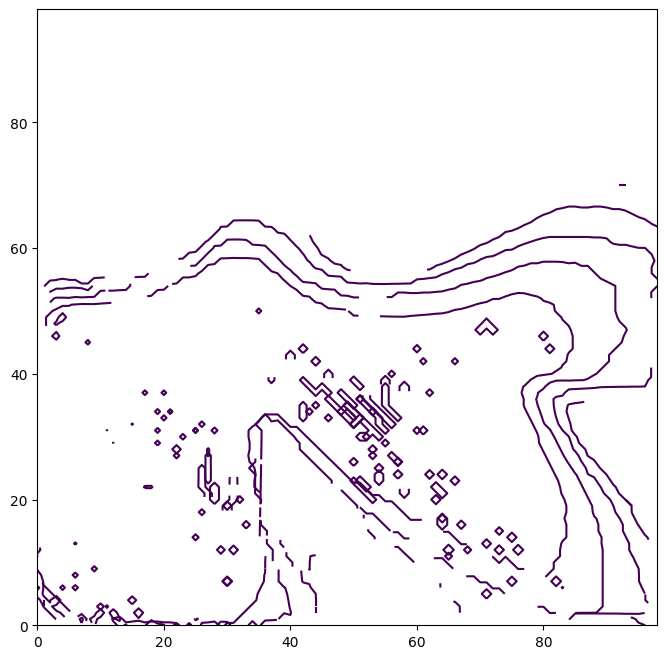

In [21]:
import matplotlib.pyplot as plt
import numpy.ma as ma
t_min, t_max = 1692931203, 1693339920
#fig, ax = plt.subplot_mosaic('01\n23\n45', figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,8))
for k in range(5):
    table = values[:, :, k, 1]
    show = ma.array(table, mask=table <10000)
    #ax = ax[str(k)]
    ax.contour(show, levels=[0.45*t_min + 0.55*t_max])

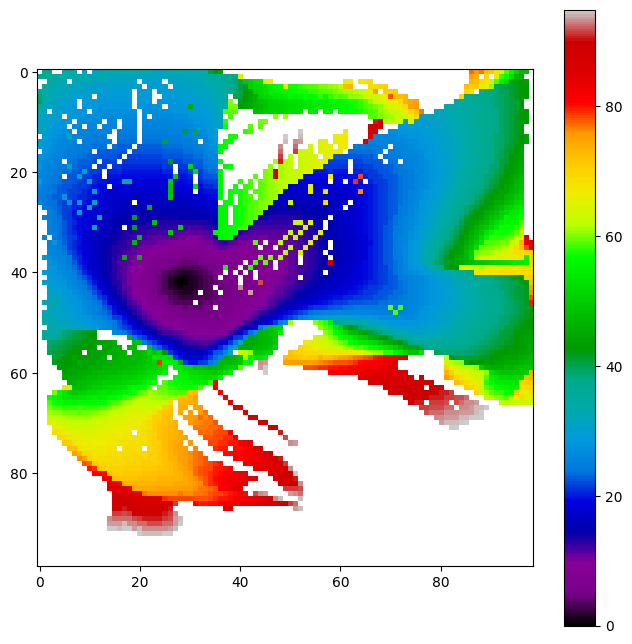

In [33]:
import matplotlib.pyplot as plt
import numpy.ma as ma
t_min, t_max = 1692931203, 1693339920
#fig, ax = plt.subplot_mosaic('01\n23\n45', figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,8))
def mask(t):
    return ma.array(t, mask=t < 1000)
t1 = mask(values[:, :, 0, 1])
t2 = mask(values[:, :, 1, 1])
pos = ax.imshow((pb.model.wind.t_start + time_opt - t1)/3600, cmap='nipy_spectral')
plt.colorbar(pos, ax=ax)

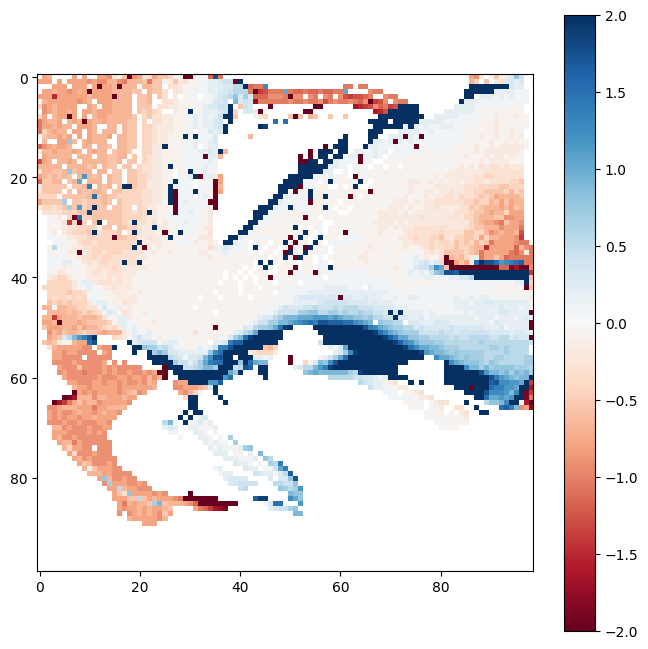

In [27]:
import matplotlib.pyplot as plt
import numpy.ma as ma
t_min, t_max = 1692931203, 1693339920
#fig, ax = plt.subplot_mosaic('01\n23\n45', figsize=(8,8))
fig, ax = plt.subplots(figsize=(8,8))
def mask(t):
    return ma.array(t, mask=t < 1000)
t1 = mask(values[:, :, 0, 1])
t2 = mask(values[:, :, 1, 1])
pos = ax.imshow(((t2 - t1)/3600 - 5)/5, cmap='RdBu', vmin=-2, vmax=2)
plt.colorbar(pos, ax=ax)

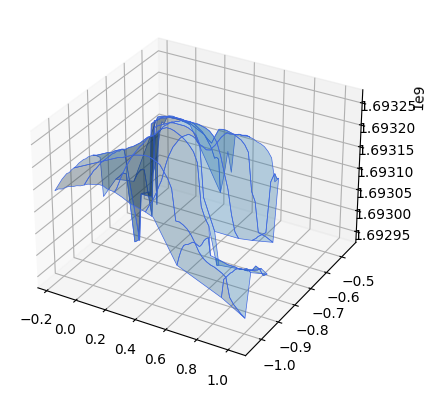

In [5]:
import matplotlib.pyplot as plt
import numpy.ma as ma
ax = plt.figure().add_subplot(projection='3d')
table = values[:, :, 0, 1]
show = ma.array(table, mask=table <10000)
# Plot the 3D surface
ax.plot_surface(grid[:-1, :-1, 0], grid[:-1,:-1,1], show, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)
plt.show()

In [51]:
table = values[:, :, :, 1]
np.min(ma.array(table, mask=table <10000))

1692931203.5305068

In [52]:
table = values[:, :, :, 1]
np.max(ma.array(table, mask=table <10000))

1693339920.0

In [34]:
from dabry.feedback import GriddedFB
gfb = GriddedFB(cmaps[0].grid, values)

In [40]:
from dabry.stoppingcond import TimedSC
pb.t_init = pb.model.wind.t_start
pb.load_feedback(gfb)
sc = TimedSC(110*3600)
pb.integrate_trajectory(pb.x_target+np.array((0.2, 0.2)), sc, 100, 1800)
ddf.set_case('test_cmap')
ddf.dump_wind(pb.model.wind)
ddf.dump_trajs(pb.trajs)

Exception: Control law : ts 1692936000 out of scope (1692987741, 0)

## Deviation wind

In [13]:
winds = [DiscreteWind() for i_member in range(51)]
for i in range(51):
    winds[i].load(f'../output/wind_scenarii3_{i}/wind.h5')
dev_wind = DiscreteWind()
dev_wind.load(f'../output/wind_scenarii3_0/wind.h5')
with tqdm(total=dev_wind.nx*dev_wind.ny*dev_wind.nt) as pbar:
    for i in range(dev_wind.nx):
        for j in range(dev_wind.ny):
            for k in range(dev_wind.nt):
                mean_u = sum([wind.uv[k, i, j, 0] for wind in winds])/51
                mean_v = sum([wind.uv[k, i, j, 1] for wind in winds])/51
                dev_wind.uv[k, i, j, 0] = np.sqrt(sum([(wind.uv[k, i, j, 0] - mean_u)**2 for wind in winds])/51)
                dev_wind.uv[k, i, j, 1] = np.sqrt(sum([(wind.uv[k, i, j, 1] - mean_v)**2 for wind in winds])/51)
                pbar.update(1)
ddf = DDFmanager()
ddf.setup()
ddf.set_case(f'wind_scenarii3_dev')
ddf.clean_output_dir()
ddf.dump_wind(dev_wind)

  0%|          | 0/456750 [00:00<?, ?it/s]